
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('T1.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [3]:
dataset = df[['Date/Time','Wind Speed (m/s)']]
dataset = dataset.rename(columns = {"Date/Time" :"timeStamp","Wind Speed (m/s)":"windSpeed"})
#dataset = dataset[:5000]

# MISSING DATA POINTS
# 2018-01-26 06:20:00  to  2018-01-30 14:40:00
# 2018-09-28 21:20:00  to  2018-10-02 16:30:00
# 2018-11-10 21:10:00  to  2018-11-14 12:00:00

newTime = []
for i in dataset['timeStamp']:
    # YYYY-MM-DD HH:MM:SS   => Required
    # DD MM YYYY HH:MM      => my format
    #print("{0}-{1}-{2} {3}:00".format(i[6:10],i[3:5],i[:2],i[11:16]))
    newTime.append(i[6:10] + "-" + i[3:5] + "-" + i[:2] + " " + i[11:16] + ":00")
dataset['timeStamp'] = newTime


In [ ]:
dataset.tail()

In [4]:
# Convert Month into Datetime
dataset['timeStamp']=pd.to_datetime(dataset['timeStamp'])

In [5]:
dataset.set_index('timeStamp',inplace=True)

In [ ]:
dataset.head()

In [6]:
dataset.describe()

,windSpeed
count,50530.000000
mean,7.557952
std,4.227166
min,0.000000
25%,4.201395
50%,7.104594
75%,10.300020
max,25.206011


# Data preprocessing


In [7]:
dataset = dataset.sort_index()
dataset.fillna(dataset.mean())

,windSpeed
timeStamp,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941
...,...
2018-12-31 23:10:00,11.404030
2018-12-31 23:20:00,7.332648
2018-12-31 23:30:00,8.435358


## Step 2: Visualize the Data

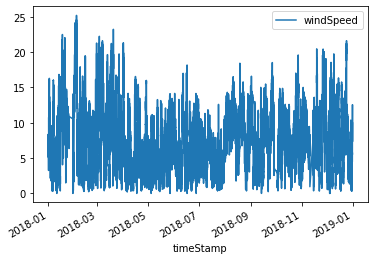

In [8]:
dataset.plot()

In [9]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [10]:
test_result=adfuller(dataset['windSpeed'])

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(windSpeed):
    result=adfuller(windSpeed)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [12]:
adfuller_test(dataset['windSpeed'])

ADF Test Statistic : -14.932536033900625
p-value : 1.359563095278069e-27
#Lags Used : 9
Number of Observations Used : 50520
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In my situation my p-value is less than 0.05 so our data is stationary and I did not do the differencing

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
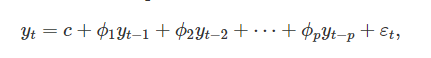

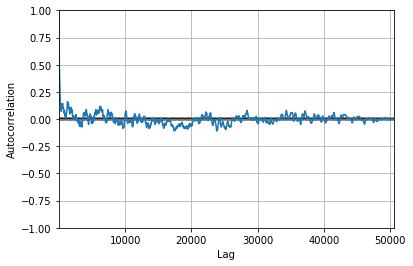

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataset['windSpeed'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q<br>
    p AR model lags<br>
    d differencing<br>
    q MA lags

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

KeyError: 'windSpeed'

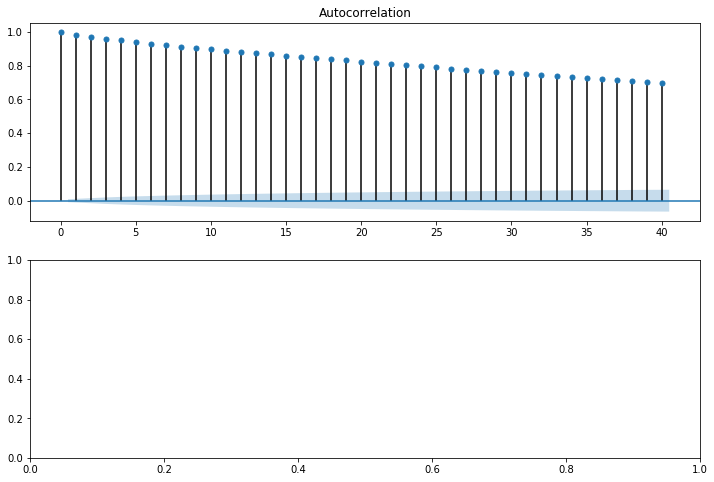

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset['windSpeed'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['windSpeed'].iloc[13:],lags=40,ax=ax2)

In [16]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [18]:
model=ARIMA(dataset['windSpeed'],order=(1,1,1))
model_fit=model.fit()

/home/skystone/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/skystone/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


MemoryError: Unable to allocate 19.0 GiB for an array with shape (50472, 50472) and data type float64

In [ ]:
model_fit.summary()

In [ ]:
dataset['forecast']=model_fit.predict(start=4000,end=4999,dynamic=True)
dataset[['windSpeed','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(dataset['windSpeed'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [ ]:
dataset['forecast']=results.predict(start=4000,end=4999,dynamic=True)
dataset[['windSpeed','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[dataset.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

In [ ]:
future_df=pd.concat([df,future_datest_df])

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 